In [111]:
import pandas as pd # to use data frames
import csv # to read .CSV files
import re
import io
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
import datetime

%matplotlib inline


In [140]:
# Store the file's content in a Pandas Dataframe
df = pd.read_csv('HittenTweetsWithPredictions.csv')
df.head(800)


,Unnamed: 0,replies,retweets,favorites,text,day,time,tokens,normalized,tokenized,predictions,username
0,0,0,0,0,وماذا عن إزعاج ما يزيد على ستة أشهر لأحياء سكن...,02/08/2020,09:16,"['وماذا', 'إزعاج', 'يزيد', 'ستة', 'أشهر', 'لأح...",وماذا ازعاج يزيد سته اشهر لاحياء سكنيه والاف ...,"['وماذا', 'ازعاج', 'يزيد', 'سته', 'اشهر', 'لاح...",negative,SsE1j8MeFSuOZY9
1,1,0,0,0,عدلك يا رب,02/04/2020,22:03,"['عدلك', 'رب']",عدلك رب,"['عدلك', 'رب']",positive,Bndr888_
2,2,1,0,0,إلا قرقعة ودوشة قارفينا ببيتي قال فن قال,24/01/2020,20:02,"['قرقعة', 'ودوشة', 'قارفينا', 'ببيتي', 'قال', ...",قرقعه ودوشه قارفينا بيتي قال فن قال,"['قرقعه', 'ودوشه', 'قارفينا', 'بيتي', 'قال', '...",negative,Bndr888_
3,3,1,0,0,٦ شهور محبورة اعيش ببيتي والبوليفارد يردح على ...,21/01/2020,21:03,"['٦', 'شهور', 'محبورة', 'اعيش', 'ببيتي', 'والب...",٦ شهور محبوره اعيش بيتي والبوليفارد يردح راسي...,"['٦', 'شهور', 'محبوره', 'اعيش', 'بيتي', 'والبو...",negative,Bndr888_
4,4,0,0,0,في شويه معرصين حطين الصورة دي انا مش مطالبه ا...,19/01/2020,21:59,"['شويه', 'معرصين', 'حطين', 'الصورة', 'دي', 'ان...",شويه معرصين حطين الصوره دي انا مش مطالبه اقعد...,"['شويه', 'معرصين', 'حطين', 'الصوره', 'دي', 'ان...",negative,Gahed0
5,5,1,0,0,حسبي الله ونعم الوكيل عدلك يا رب العالمين,18/01/2020,20:01,"['حسبي', 'الله', 'ونعم', 'الوكيل', 'عدلك', 'رب...",حسبي اله ونعم الوكيل عدلك رب العالمين,"['حسبي', 'اله', 'ونعم', 'الوكيل', 'عدلك', 'رب'...",positive,Bndr888_
6,6,0,0,0,حلول المرور مشاكل يقفلون اليوتيرن اللي عند اشا...,16/01/2020,20:50,"['حلول', 'المرور', 'مشاكل', 'يقفلون', 'اليوتير...",حلول المرور مشاكل يقفلون اليوتيرن الي اشاره ت...,"['حلول', 'المرور', 'مشاكل', 'يقفلون', 'اليوتير...",negative,shathaalsalem
7,7,1,0,0,عدلك يا رب في المسؤول عن هذا الازعاج و السماعا...,13/01/2020,20:17,"['عدلك', 'رب', 'المسؤول', 'الازعاج', 'و', 'الس...",عدلك رب المسؤول الازعاج و السماعات المسعوره ا...,"['عدلك', 'رب', 'المسؤول', 'الازعاج', 'و', 'الس...",negative,Bndr888_
8,8,1,0,0,اتمنى نلقى حل لهذي المشكلة جدا جدا جدا متعب ال...,01/12/2020,22:22,"['اتمنى', 'نلقى', 'حل', 'لهذي', 'المشكلة', 'جد...",اتمني نلقي حل لهذي المشكله جدا جدا جدا متعب ا...,"['اتمني', 'نلقي', 'حل', 'لهذي', 'المشكله', 'جد...",negative,HanadiM1
9,9,0,0,0,اقول روقو يااهل حطين المتر عندكم ب ٥٠٠٠الآف ...,01/01/2020,10:51,"['اقول', 'روقو', 'يااهل', 'حطين', 'المتر', 'عن...",اقول روقو ياهل حطين المتر عندكم ب ٥٠الاف مايض...,"['اقول', 'روقو', 'ياهل', 'حطين', 'المتر', 'عند...",negative,inter700


# Descriptive Analysis
A) Asses the available data

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 12 columns):
Unnamed: 0     813 non-null int64
replies        813 non-null int64
retweets       813 non-null int64
favorites      813 non-null int64
text           813 non-null object
day            813 non-null object
time           813 non-null object
tokens         813 non-null object
normalized     813 non-null object
tokenized      813 non-null object
predictions    813 non-null object
username       813 non-null object
dtypes: int64(4), object(8)
memory usage: 76.3+ KB


In [142]:
df = df.drop('Unnamed: 0', 1)


In [143]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
df.head(10)

,replies,retweets,favorites,text,day,time,tokens,normalized,tokenized,predictions,username
0,0,0,0,وماذا عن إزعاج ما يزيد على ستة أشهر لأحياء سكن...,02/08/2020,09:16,"['وماذا', 'إزعاج', 'يزيد', 'ستة', 'أشهر', 'لأح...",وماذا ازعاج يزيد سته اشهر لاحياء سكنيه والاف ...,"['وماذا', 'ازعاج', 'يزيد', 'سته', 'اشهر', 'لاح...",negative,SsE1j8MeFSuOZY9
1,0,0,0,عدلك يا رب,02/04/2020,22:03,"['عدلك', 'رب']",عدلك رب,"['عدلك', 'رب']",positive,Bndr888_
2,1,0,0,إلا قرقعة ودوشة قارفينا ببيتي قال فن قال,24/01/2020,20:02,"['قرقعة', 'ودوشة', 'قارفينا', 'ببيتي', 'قال', ...",قرقعه ودوشه قارفينا بيتي قال فن قال,"['قرقعه', 'ودوشه', 'قارفينا', 'بيتي', 'قال', '...",negative,Bndr888_
3,1,0,0,٦ شهور محبورة اعيش ببيتي والبوليفارد يردح على ...,21/01/2020,21:03,"['٦', 'شهور', 'محبورة', 'اعيش', 'ببيتي', 'والب...",٦ شهور محبوره اعيش بيتي والبوليفارد يردح راسي...,"['٦', 'شهور', 'محبوره', 'اعيش', 'بيتي', 'والبو...",negative,Bndr888_
4,0,0,0,في شويه معرصين حطين الصورة دي انا مش مطالبه ا...,19/01/2020,21:59,"['شويه', 'معرصين', 'حطين', 'الصورة', 'دي', 'ان...",شويه معرصين حطين الصوره دي انا مش مطالبه اقعد...,"['شويه', 'معرصين', 'حطين', 'الصوره', 'دي', 'ان...",negative,Gahed0
5,1,0,0,حسبي الله ونعم الوكيل عدلك يا رب العالمين,18/01/2020,20:01,"['حسبي', 'الله', 'ونعم', 'الوكيل', 'عدلك', 'رب...",حسبي اله ونعم الوكيل عدلك رب العالمين,"['حسبي', 'اله', 'ونعم', 'الوكيل', 'عدلك', 'رب'...",positive,Bndr888_
6,0,0,0,حلول المرور مشاكل يقفلون اليوتيرن اللي عند اشا...,16/01/2020,20:50,"['حلول', 'المرور', 'مشاكل', 'يقفلون', 'اليوتير...",حلول المرور مشاكل يقفلون اليوتيرن الي اشاره ت...,"['حلول', 'المرور', 'مشاكل', 'يقفلون', 'اليوتير...",negative,shathaalsalem
7,1,0,0,عدلك يا رب في المسؤول عن هذا الازعاج و السماعا...,13/01/2020,20:17,"['عدلك', 'رب', 'المسؤول', 'الازعاج', 'و', 'الس...",عدلك رب المسؤول الازعاج و السماعات المسعوره ا...,"['عدلك', 'رب', 'المسؤول', 'الازعاج', 'و', 'الس...",negative,Bndr888_
8,1,0,0,اتمنى نلقى حل لهذي المشكلة جدا جدا جدا متعب ال...,01/12/2020,22:22,"['اتمنى', 'نلقى', 'حل', 'لهذي', 'المشكلة', 'جد...",اتمني نلقي حل لهذي المشكله جدا جدا جدا متعب ا...,"['اتمني', 'نلقي', 'حل', 'لهذي', 'المشكله', 'جد...",negative,HanadiM1
9,0,0,0,اقول روقو يااهل حطين المتر عندكم ب ٥٠٠٠الآف ...,01/01/2020,10:51,"['اقول', 'روقو', 'يااهل', 'حطين', 'المتر', 'عن...",اقول روقو ياهل حطين المتر عندكم ب ٥٠الاف مايض...,"['اقول', 'روقو', 'ياهل', 'حطين', 'المتر', 'عند...",negative,inter700


B) Prepare the needed columns for the analysis

**B.1) Tweets length**

In [144]:
#find the length of each tweet
df['length']=df['text'].apply(len)
df.head(30)

,replies,retweets,favorites,text,day,time,tokens,normalized,tokenized,predictions,username,length
0,0,0,0,وماذا عن إزعاج ما يزيد على ستة أشهر لأحياء سكن...,02/08/2020,09:16,"['وماذا', 'إزعاج', 'يزيد', 'ستة', 'أشهر', 'لأح...",وماذا ازعاج يزيد سته اشهر لاحياء سكنيه والاف ...,"['وماذا', 'ازعاج', 'يزيد', 'سته', 'اشهر', 'لاح...",negative,SsE1j8MeFSuOZY9,161
1,0,0,0,عدلك يا رب,02/04/2020,22:03,"['عدلك', 'رب']",عدلك رب,"['عدلك', 'رب']",positive,Bndr888_,14
2,1,0,0,إلا قرقعة ودوشة قارفينا ببيتي قال فن قال,24/01/2020,20:02,"['قرقعة', 'ودوشة', 'قارفينا', 'ببيتي', 'قال', ...",قرقعه ودوشه قارفينا بيتي قال فن قال,"['قرقعه', 'ودوشه', 'قارفينا', 'بيتي', 'قال', '...",negative,Bndr888_,46
3,1,0,0,٦ شهور محبورة اعيش ببيتي والبوليفارد يردح على ...,21/01/2020,21:03,"['٦', 'شهور', 'محبورة', 'اعيش', 'ببيتي', 'والب...",٦ شهور محبوره اعيش بيتي والبوليفارد يردح راسي...,"['٦', 'شهور', 'محبوره', 'اعيش', 'بيتي', 'والبو...",negative,Bndr888_,163
4,0,0,0,في شويه معرصين حطين الصورة دي انا مش مطالبه ا...,19/01/2020,21:59,"['شويه', 'معرصين', 'حطين', 'الصورة', 'دي', 'ان...",شويه معرصين حطين الصوره دي انا مش مطالبه اقعد...,"['شويه', 'معرصين', 'حطين', 'الصوره', 'دي', 'ان...",negative,Gahed0,160
5,1,0,0,حسبي الله ونعم الوكيل عدلك يا رب العالمين,18/01/2020,20:01,"['حسبي', 'الله', 'ونعم', 'الوكيل', 'عدلك', 'رب...",حسبي اله ونعم الوكيل عدلك رب العالمين,"['حسبي', 'اله', 'ونعم', 'الوكيل', 'عدلك', 'رب'...",positive,Bndr888_,43
6,0,0,0,حلول المرور مشاكل يقفلون اليوتيرن اللي عند اشا...,16/01/2020,20:50,"['حلول', 'المرور', 'مشاكل', 'يقفلون', 'اليوتير...",حلول المرور مشاكل يقفلون اليوتيرن الي اشاره ت...,"['حلول', 'المرور', 'مشاكل', 'يقفلون', 'اليوتير...",negative,shathaalsalem,146
7,1,0,0,عدلك يا رب في المسؤول عن هذا الازعاج و السماعا...,13/01/2020,20:17,"['عدلك', 'رب', 'المسؤول', 'الازعاج', 'و', 'الس...",عدلك رب المسؤول الازعاج و السماعات المسعوره ا...,"['عدلك', 'رب', 'المسؤول', 'الازعاج', 'و', 'الس...",negative,Bndr888_,147
8,1,0,0,اتمنى نلقى حل لهذي المشكلة جدا جدا جدا متعب ال...,01/12/2020,22:22,"['اتمنى', 'نلقى', 'حل', 'لهذي', 'المشكلة', 'جد...",اتمني نلقي حل لهذي المشكله جدا جدا جدا متعب ا...,"['اتمني', 'نلقي', 'حل', 'لهذي', 'المشكله', 'جد...",negative,HanadiM1,191
9,0,0,0,اقول روقو يااهل حطين المتر عندكم ب ٥٠٠٠الآف ...,01/01/2020,10:51,"['اقول', 'روقو', 'يااهل', 'حطين', 'المتر', 'عن...",اقول روقو ياهل حطين المتر عندكم ب ٥٠الاف مايض...,"['اقول', 'روقو', 'ياهل', 'حطين', 'المتر', 'عند...",negative,inter700,60


In [147]:
#Calculate total engagements then sort them desc.
df['Total_Engagements']=df['retweets']+df['favorites']+df['replies']
df.sort_values(by=['Total_Engagements'],ascending=False).head(10)

,replies,retweets,favorites,text,day,time,tokens,normalized,tokenized,predictions,username,length,Total_Engagements
756,2,48,192,برغم معاناة الحرب تبقي كرة القدم وحدها هي المت...,2017-11-03,15:42,"['برغم', 'معاناة', 'الحرب', 'تبقي', 'كرة', 'ال...",برغم معاناه الحرب تبقي كره القدم وحدها المتنف...,"['برغم', 'معاناه', 'الحرب', 'تبقي', 'كره', 'ال...",positive,AbdullahShasha,123,242
776,10,120,95,عبدالرحمن الحمدان مدرب فريق حطين يتحدث في بش...,2016-12-04,21:29,"['عبدالرحمن', 'الحمدان', 'مدرب', 'فريق', 'حطين...",عبدالرحمن الحمدان مدرب فريق حطين يتحدث بشجاعه...,"['عبدالرحمن', 'الحمدان', 'مدرب', 'فريق', 'حطين...",neutral,anoodalaskar1,126,225
399,31,134,59,هل هذه المناظر منصفة لأهالي حي حطين الكرام من ...,2019-10-18,12:03,"['المناظر', 'منصفة', 'لأهالي', 'حي', 'حطين', '...",المناظر منصفه لاهالي حي حطين الكرام خرج يستطع...,"['المناظر', 'منصفه', 'لاهالي', 'حي', 'حطين', '...",negative,Looje2,144,224
738,13,102,42,نتمنى أن توزع بطاقات أو ستيكرات لسكان الحي حتى...,2019-10-06,09:27,"['نتمنى', 'توزع', 'بطاقات', 'ستيكرات', 'لسكان'...",نتمني توزع بطاقات ستيكرات لسكان الحي يتسني ال...,"['نتمني', 'توزع', 'بطاقات', 'ستيكرات', 'لسكان'...",neutral,sh3olas,175,157
222,19,82,48,ان يتحول الترفية لتطفيش اهالي حي نخرج ان خرجنا...,2019-10-19,10:31,"['ان', 'يتحول', 'الترفية', 'لتطفيش', 'اهالي', ...",ان يتحول الترفيه لتطفيش اهالي حي نخرج ان خرجن...,"['ان', 'يتحول', 'الترفيه', 'لتطفيش', 'اهالي', ...",negative,sh3olas,251,149
497,42,43,62,أنا قررت إني ما أطلع من بيتي الليلة لأني أنض...,2019-10-17,18:52,"['قررت', 'إني', 'أطلع', 'بيتي', 'الليلة', 'لأن...",قرت اني اطلع بيتي اليله لاني انضغط الزحمه الح...,"['قرت', 'اني', 'اطلع', 'بيتي', 'اليله', 'لاني'...",positive,alsahli_12,199,147
724,27,79,34,سكان يشاركون في هذا الهاشتاق لنقل معاناتهم...,2019-10-06,10:55,"['سكان', 'يشاركون', 'الهاشتاق', 'لنقل', 'معانا...",سكان يشاركون الهاشتاق لنقل معاناتهم قبل بدايه...,"['سكان', 'يشاركون', 'الهاشتاق', 'لنقل', 'معانا...",neutral,ohood_alhassan,140,140
573,16,67,40,مع بداية موسم الرياض نتمنى ايجاد حل لسكان حي ح...,2019-10-12,05:44,"['بداية', 'موسم', 'الرياض', 'نتمنى', 'ايجاد', ...",بدايه موسم الرياض نتمني ايجاد حل لسكان حي حطي...,"['بدايه', 'موسم', 'الرياض', 'نتمني', 'ايجاد', ...",neutral,Abdulmajeed1897,257,123
508,11,73,32,لو فيه اي حاله طارئه لاسمح الله لاحد اهالي ا...,2019-10-17,17:47,"['اي', 'حاله', 'طارئه', 'لاسمح', 'الله', 'لاحد...",اي حاله طارئه لاسمح اله لاحد اهالي الحاره بال...,"['اي', 'حاله', 'طارئه', 'لاسمح', 'اله', 'لاحد'...",negative,Noufii951,111,116
511,13,52,30,ابو ناصر العمل في تاريخي و متكامل لكن نحتاج...,2019-10-17,17:12,"['ابو', 'ناصر', 'العمل', 'تاريخي', 'و', 'متكام...",ابو ناصر العمل تاريخي و متكامل نحتاج حل لمشكل...,"['ابو', 'ناصر', 'العمل', 'تاريخي', 'و', 'متكام...",neutral,3zMadhi,136,95


In [148]:
#df['day']=df['day'].str.replace('/','-')
df['day']= pd.to_datetime(df['day'])
df.head()

,replies,retweets,favorites,text,day,time,tokens,normalized,tokenized,predictions,username,length,Total_Engagements
0,0,0,0,وماذا عن إزعاج ما يزيد على ستة أشهر لأحياء سكن...,2020-02-08,09:16,"['وماذا', 'إزعاج', 'يزيد', 'ستة', 'أشهر', 'لأح...",وماذا ازعاج يزيد سته اشهر لاحياء سكنيه والاف ...,"['وماذا', 'ازعاج', 'يزيد', 'سته', 'اشهر', 'لاح...",negative,SsE1j8MeFSuOZY9,161,0
1,0,0,0,عدلك يا رب,2020-02-04,22:03,"['عدلك', 'رب']",عدلك رب,"['عدلك', 'رب']",positive,Bndr888_,14,0
2,1,0,0,إلا قرقعة ودوشة قارفينا ببيتي قال فن قال,2020-01-24,20:02,"['قرقعة', 'ودوشة', 'قارفينا', 'ببيتي', 'قال', ...",قرقعه ودوشه قارفينا بيتي قال فن قال,"['قرقعه', 'ودوشه', 'قارفينا', 'بيتي', 'قال', '...",negative,Bndr888_,46,1
3,1,0,0,٦ شهور محبورة اعيش ببيتي والبوليفارد يردح على ...,2020-01-21,21:03,"['٦', 'شهور', 'محبورة', 'اعيش', 'ببيتي', 'والب...",٦ شهور محبوره اعيش بيتي والبوليفارد يردح راسي...,"['٦', 'شهور', 'محبوره', 'اعيش', 'بيتي', 'والبو...",negative,Bndr888_,163,1
4,0,0,0,في شويه معرصين حطين الصورة دي انا مش مطالبه ا...,2020-01-19,21:59,"['شويه', 'معرصين', 'حطين', 'الصورة', 'دي', 'ان...",شويه معرصين حطين الصوره دي انا مش مطالبه اقعد...,"['شويه', 'معرصين', 'حطين', 'الصوره', 'دي', 'ان...",negative,Gahed0,160,0


In [173]:
df=df[df['Total_Engagements'] > 3]
df2=df.sample(20)
data = px.scatter(df2,x='day', y='Total_Engagements', range_x=['2019-10-01', '2019-10-30'],
         size='length', color="predictions",
                 hover_name="predictions", log_x=False, size_max=30,
        )
data.show()

In [31]:
#find the average of tweets length by their label
df[['length','predictions']].groupby('predictions').mean()

,length
predictions,
negative,129.198582
neutral,105.465455
positive,114.886957


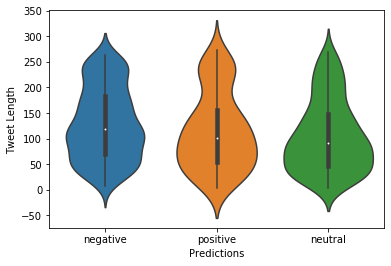

In [104]:
sb.violinplot(data=df, x='predictions', y='length');
plt.xlabel('Predictions');
plt.ylabel('Tweet Length');

**B.2) Author's tweeting frequency**

In [45]:
#count usernames occurences
df.username.value_counts().head(20)

huda09056256       52
alohi20000         30
sh3olas            28
n3355na            21
SsE1j8MeFSuOZY9    17
angeldeams_o       14
n_hteen            13
Bndr888_           12
Reem94s            12
NorahAlhazzani      9
aalyaser            8
sahamfaris          7
SamarFahad__        7
selten9             7
amowinea            6
_Trevortni          5
9ad8ahS             5
captainnfnf         5
WUQComF9g8LeJkr     5
fahad_MH            5
Name: username, dtype: int64

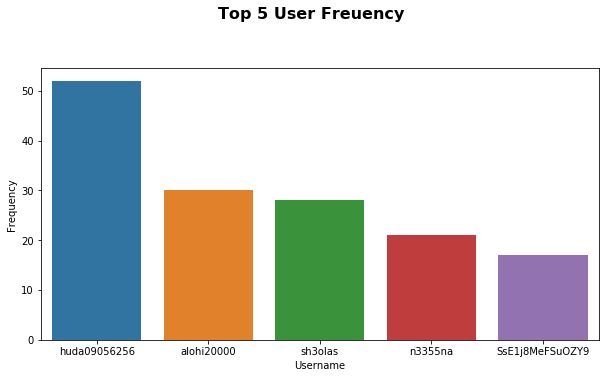

In [51]:
# bar chart
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = df, x = "username", order = df.username.value_counts().iloc[:5].index);
graph.set_xlabel('Username');
graph.set_ylabel('Frequency');
plt.suptitle('Top 5 User Freuency', y=1.05, fontsize=16, fontweight='bold');

**B.3) Top 5 tweet's engagment**

In [75]:
#Calculate total engagements then sort them desc.
df['Total_Engagements']=df['retweets']+df['favorites']+df['replies']
df[['text','retweets','favorites','replies','Total engagements']].sort_values(by=['retweets'],ascending=False).head(5)

,text,retweets,favorites,replies,Total engagements
399,هل هذه المناظر منصفة لأهالي حي حطين الكرام من ...,134,59,31,224
776,عبدالرحمن الحمدان مدرب فريق حطين يتحدث في بش...,120,95,10,225
738,نتمنى أن توزع بطاقات أو ستيكرات لسكان الحي حتى...,102,42,13,157
222,ان يتحول الترفية لتطفيش اهالي حي نخرج ان خرجنا...,82,48,19,149
724,سكان يشاركون في هذا الهاشتاق لنقل معاناتهم...,79,34,27,140


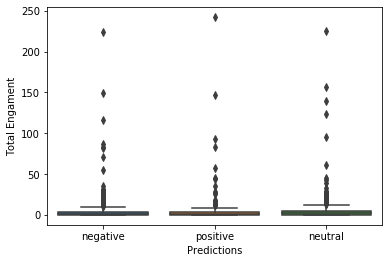

In [155]:
sb.boxplot(data=df, x='predictions', y='Total_Engagements');
plt.xlabel('Predictions');
plt.ylabel('Total Engament');

**B.4) Time series analysis**

* B.4.1) Days



In [62]:
#identify the date when more tweets were posted
df.day.value_counts()

18/10/2019    183
17/10/2019     88
10/06/2019     87
19/10/2019     82
21/10/2019     35
10/12/2019     28
10/07/2019     27
10/10/2019     22
20/10/2019     20
22/10/2019     19
10/08/2019     18
31/12/2019     15
18/12/2019     10
12/04/2016     10
11/07/2019      9
14/10/2019      8
10/09/2019      7
13/10/2019      6
15/12/2019      6
24/10/2019      6
12/05/2016      5
10/11/2019      5
28/10/2019      4
15/10/2019      4
23/10/2019      4
29/01/2013      3
14/12/2019      3
01/01/2020      3
26/10/2019      3
02/02/2015      3
19/12/2019      3
26/12/2019      2
12/10/2014      2
17/12/2019      2
25/02/2017      2
12/06/2019      2
11/05/2019      2
14/11/2019      2
11/08/2019      2
25/10/2019      2
08/05/2018      1
01/03/2014      1
12/05/2012      1
18/09/2012      1
02/04/2020      1
20/11/2019      1
12/06/2014      1
20/09/2019      1
31/08/2018      1
02/05/2017      1
02/06/2017      1
03/07/2013      1
02/08/2020      1
13/05/2015      1
02/05/2016      1
06/02/2014

In [63]:
#top 5 days with highest tweeting frequency 
df.day.value_counts().head(5)

18/10/2019    183
17/10/2019     88
10/06/2019     87
19/10/2019     82
21/10/2019     35
Name: day, dtype: int64

In [64]:
#top 5 days with lowest tweeting frequency 
df.day.value_counts().tail(5)

02/12/2019    1
16/03/2019    1
17/03/2012    1
28/12/2016    1
22/11/2019    1
Name: day, dtype: int64

* B.4.2) Hours



In [7]:
#identify the hour when more tweets were posted
df['hour'] = df['time'].str[:2]

In [8]:
#top 5 hours with highest tweeting frequency 
df.hour.value_counts().head(5)

19    88
22    74
21    71
10    50
20    46
Name: hour, dtype: int64

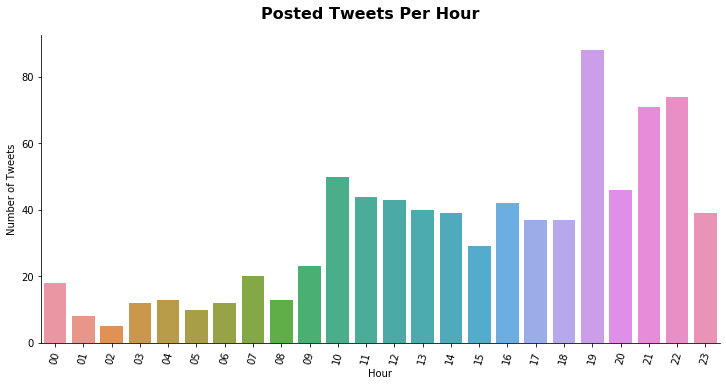

In [140]:
graph = sb.catplot(data=df, x='hour', kind='count', sharey = False, height=5, aspect=2);
graph.set_axis_labels("Hour", "Number of Tweets")
#graph._legend.set_title('Predictions')
graph.set_titles("{col_name}")
graph.fig.suptitle('Posted Tweets Per Hour', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

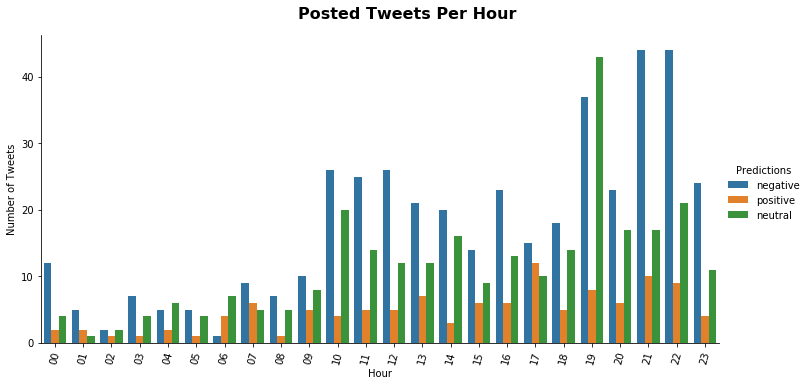

In [142]:
graph = sb.catplot(data=df, x='hour', hue="predictions", kind='count', sharey = False, height=5, aspect=2);
graph.set_axis_labels("Hour", "Number of Tweets")
graph._legend.set_title('Predictions')
graph.set_titles("{col_name}")
graph.fig.suptitle('Posted Tweets Per Hour', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

In [68]:
#top 5 hours with lowest tweeting frequency 
df.hour.value_counts().tail(5)

03    12
06    12
05    10
01     8
02     5
Name: hour, dtype: int64

**B.5) Words occurences**

In [9]:
#import needed libraries for word occurences
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


In [10]:
#instantiate CountVectorizer()
counterVec=CountVectorizer()
 
#generate the term counts
word_count_vector=counterVec.fit_transform(df['tokenized'])
 

In [11]:
#we have 813 tweets and 5502 unique words
word_count_vector.shape

(813, 5502)

B.5.1) Use IDF to count term frequency


In [15]:
#to prevent zero divisions when the words occurs in every tweet, use smooth_idf=True.
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
#compute the IDF values
tfidf_transformer.fit(word_count_vector)


TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [16]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=counterVec.get_feature_names(),columns=["idf weights"])
 
#sort ascending - the heigher the weight the less frequent the word is.
#most 10 frequent words
df_idf.sort_values(by=['idf weights']).head(20)

,idf weights
الحي,2.354853
حطين,2.542905
اله,2.711528
الي,2.819158
الرياض,2.865678
معاناه,3.048000
سكان,3.086840
حي,3.158666
حل,3.453465
موسم,3.527573


In [0]:
#least 10 frequent words
df_idf.sort_values(by=['idf weights']).tail(20)

,idf weights
جنب,7.008813
جنودنا,7.008813
جهات,7.008813
جهدا,7.008813
حادث,7.008813
حاجز,7.008813
حاجتي,7.008813
حابه,7.008813
حاب,7.008813
جيرانحارتنا,7.008813
